### Example of using xgboost

In [21]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

#allows printing of all data in cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [ ]:
train = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                      skiprows = 1, header = None) # Make sure to skip a row for the test set

In [10]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [13]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

In [15]:
train.columns = columns
test.columns = columns

In [16]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
test.shape,train.shape

((16281, 15), (32561, 15))

Original datasets had 32561 and 16281.  Unknowns labeled with ?, remove these unknown rows 

In [22]:
#Check sizes
train.replace(' ?',np.nan).dropna().shape
test.replace(' ?',np.nan).dropna().shape

(30162, 15)

(15060, 15)

In [33]:
#Replace
train_nomissing = train.replace(' ?', np.nan).dropna()
test_nomissing = test.replace(' ?', np.nan).dropna()

In [43]:
#clean up differences
test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [44]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [45]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
#We have non numeric data
train_nomissing.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class        object
dtype: object

In [49]:
train_nomissing.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

One hot encoding not usually needed for ensemble methods but can be for linear methods.  For one hot encoding can use get_dummies but this can add many more features.  Try using ordinal encoding instead

In [50]:
#do same for train and test
combined_df = pd.concat([train_nomissing,test_nomissing],axis=0)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [52]:
#if not numeric apply 
for feat in combined_df.columns:
    if combined_df[feat].dtype == 'object':
        combined_df[feat] = pd.Categorical(combined_df[feat]).codes

In [54]:
combined_df.workclass.unique()

array([5, 4, 2, 0, 1, 3, 6])

In [55]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


In [57]:
final_train = combined_df[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_df[train_nomissing.shape[0]:] # Past the last initial training set row

In [58]:
final_train.shape,final_test.shape

((30162, 15), (15060, 15))

In [59]:
#get the targets
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

### XGBoost

In [62]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [63]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [64]:
optimized_GBM.fit(final_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [65]:
print(dir(optimized_GBM))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_fit', '_get_param_names', 'best_estimator_', 'best_params_', 'best_score_', 'classes_', 'cv', 'decision_function', 'error_score', 'estimator', 'fit', 'fit_params', 'get_params', 'grid_scores_', 'iid', 'inverse_transform', 'n_jobs', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 'refit', 'score', 'scorer_', 'scoring', 'set_params', 'transform', 'verbose']


In [67]:
optimized_GBM.grid_scores_

[mean: 0.86725, std: 0.00381, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86771, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86781, std: 0.00397, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86224, std: 0.00261, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86118, std: 0.00277, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86228, std: 0.00249, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85522, std: 0.00323, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85664, std: 0.00356, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85621, std: 0.00293, params: {'max_depth': 7, 'min_child_weight': 5}]

second combination gave best results

In [68]:
#try playing with learning rate and subsampling
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [69]:
optimized_GBM.grid_scores_

[mean: 0.86705, std: 0.00334, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.86771, std: 0.00339, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.86768, std: 0.00301, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.85989, std: 0.00295, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.85979, std: 0.00305, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86022, std: 0.00315, params: {'learning_rate': 0.01, 'subsample': 0.9}]

Use learning rate (eta) = 0.1, subsample = 0.8, max depth = 3, min child weight = 3


### Early stopping CV

In [75]:
xdgmat = xgb.DMatrix(final_train,y_train)

In [79]:
#stopping and say we don’t want the accuracy to improve for at least 100 new trees.

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xdgmat, num_boost_round = 4000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [80]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
486,0.130338,0.004504,0.116446,0.001257
487,0.130239,0.004401,0.116512,0.001248
488,0.130206,0.004329,0.116570,0.001340
489,0.130205,0.004355,0.116520,0.001234
490,0.129907,0.004335,0.116620,0.001215


best results  12.99% or 87.01% accuracy, create model with these best settings

In [83]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 

final_gb = xgb.train(our_params, xdgmat, num_boost_round = 490)

In [84]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

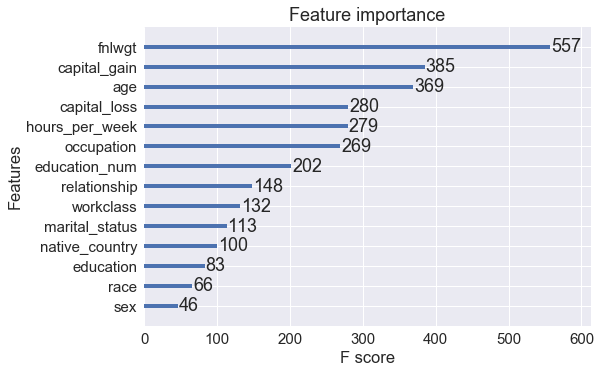

In [86]:
xgb.plot_importance(final_gb);

### Analyse on test data

In [88]:
testdmat = xgb.DMatrix(final_test)

In [90]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat)
y_pred

array([ 0.00260711,  0.21333715,  0.32347989, ...,  0.85653925,
        0.17038919,  0.77807492], dtype=float32)

In [91]:
y_pred[y_pred > 0.5] =1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

In [92]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.86992031872509956, 0.13007968127490044)

In [95]:
#86.99% accuracy or 13.01% error rate

In [96]:
ls

EDA_PortESeguro.ipynb  XGBoost.ipynb


In [97]:
pwd

'/Users/rich/Documents/python/kaggle/P2'